In [ ]:
import pandas as pd
import nltk
import nltk.sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet
from nltk.corpus import opinion_lexicon
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [52]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('all-corpora')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nlt

True

In [53]:
df = pd.read_csv("/Dataset.csv")
rating_text = df["Rating text"]

In [54]:
stop_words = set(stopwords.words("english"))
rating_text = [word for word in rating_text if word not in stop_words]

In [55]:
rating_text_str = str(rating_text)
tokens = nltk.word_tokenize(rating_text_str)


In [56]:
word_counts = nltk.FreqDist(tokens)

In [58]:
positive_keywords = []
negative_keywords = []

for word, count in word_counts.items():
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(word)

    if sentiment['pos'] > 0.5:
        positive_keywords.append(word)
    elif sentiment['neg'] > 0.5:
        negative_keywords.append(word)

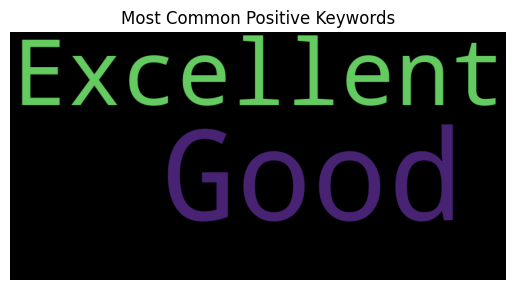

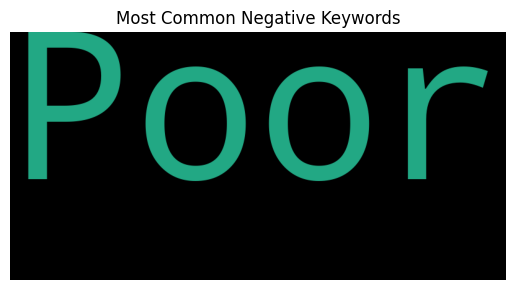

In [59]:
wordcloud1 = WordCloud(width=800, height=400).generate(
    " ".join(positive_keywords))
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("Most Common Positive Keywords")
plt.show()

wordcloud2 = WordCloud(width=800, height=400).generate(
    " ".join(negative_keywords))
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Most Common Negative Keywords")
plt.show()
